# CLASSWORK2 - TFIDF

## IMPORTING PACKAGES AND CSV FILE

In [1]:
# Import the pandas library and aliasing it as 'pd' 
import pandas as pd
file = "un-general-debates-blueprint.csv"
df = pd.read_csv(file)
# Display the first 10 rows of the DataFrame
df.head(10)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


## IMPORTING STOPWORDS

In [2]:
# Import the Natural Language Toolkit (nltk) library
import nltk 
# Downloading the 'stopwords' dataset from nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"should've", 'my', 'down', 'doesn', 'then', 'what', 'haven', 'some', 'about', 'too', 'you', 'both', 'before', 'that', 'while', 'under', 'more', 'than', "weren't", 'should', "it's", "you're", 'from', 'over', 'when', 'is', "shouldn't", 'not', "shan't", 'do', "wasn't", "you'd", "isn't", 'are', 'them', 'at', 'up', 'ain', "mightn't", 'our', "that'll", 'hadn', 'few', 'again', 'will', 'she', 'each', 'it', 'shouldn', 'having', 'as', 'where', 'if', 'or', "hasn't", 'his', 'him', 'on', "doesn't", 'ourselves', 'now', 'themselves', 'very', 'its', 'and', 'any', "aren't", 'such', 'were', 'isn', 'who', "you'll", 'once', 'to', 'd', 'am', 'a', 'in', 'myself', 'herself', 'because', 'until', 'have', 'mightn', 'being', 'theirs', 'ma', 'they', 'been', 'by', 'wasn', 'here', "hadn't", 'll', 'he', 'an', 'against', 'yourselves', 'didn', "mustn't", 'own', 'don', 'm', 'all', 'has', 'out', "she's", 'your', 'but', 'just', 'there', 've', "didn't", 'through', 'further', 're', 'yours', "needn't", 'during', 's', 'off'

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/likithareddykotla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## PRE PROCESSING PIPELINE

In [3]:
# Import the 'regex' module and alias it as 're'
import regex as re
# Function to tokenize text using a regex pattern
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# List of functions to create a processing pipeline
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

## COUNTING TOKENS

In [4]:
# Import the Counter class from the collections module
from collections import Counter
counter = Counter()
# Map the 'update' method of the Counter to each list of tokens in the 'tokens' column of the DataFrame
df['tokens'].map(counter.update)
# Create a DataFrame from the Counter, representing token frequencies
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
# Filter the DataFrame to include only tokens with frequencies greater than or equal to 1
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


## WORDCLOUD

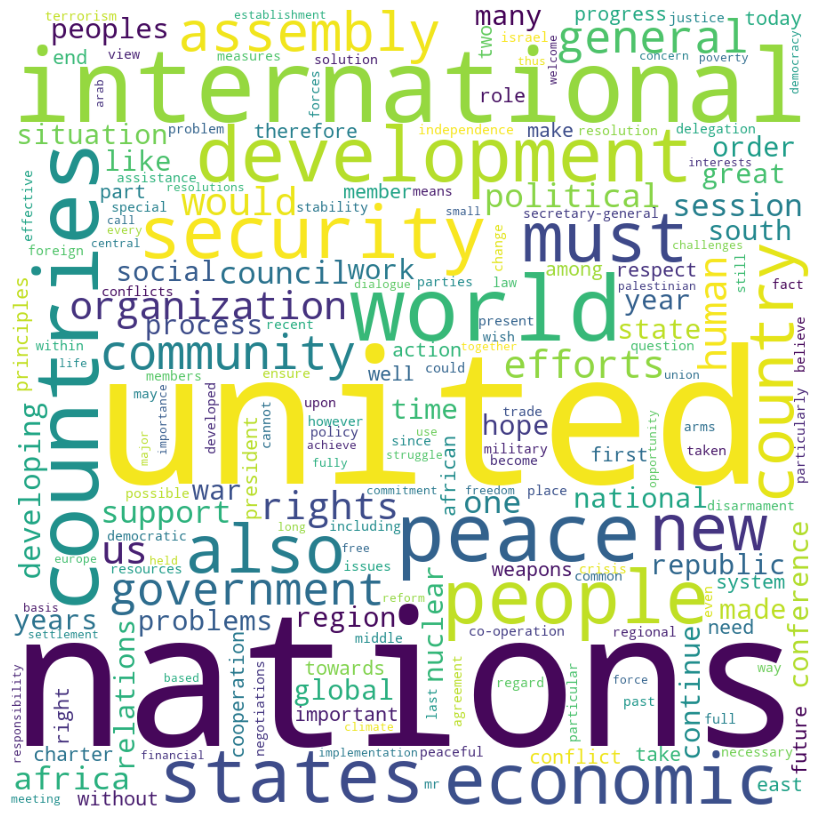

In [5]:
# Import the WordCloud class from the wordcloud module
from wordcloud import WordCloud
from matplotlib import pyplot as plt
# Create a WordCloud object with specified parameters (background color, width, height, margin)
wc = WordCloud(background_color='white', width = 900, height=900, margin=2)
# Fit the WordCloud with the token frequencies from the 'freq_df' DataFrame
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
# Ensure tight layout for aesthetics
plt.tight_layout(pad = 0)
 
plt.show()

## TFIDF VS IDF

is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus). TF-IDF is commonly used in information retrieval and text mining to identify the importance of words in a document or a set of documents.

In [9]:
# Import the numpy library and alias it as 'np'
import numpy as np

# Function to compute inverse document frequency (IDF)
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
        # Function to update the counter with unique tokens in each document
        def update(doc):
            tokens = doc if preprocess is None else preprocess(doc)
            counter.update(set(tokens))
    # count tokens
        counter = Counter()
        df[column].map(update)
    # create data frame and compute idf
        idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
        idf_df = idf_df.query('df >= @min_df')
        idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
        idf_df.index.name = 'token'
        return idf_df
idf_df = compute_idf(df)

## CALCULATING TFIDF = TF * IDF

In [10]:
# Compute TF-IDF (Term Frequency-Inverse Document Frequency) values
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


## WORDCLOUD


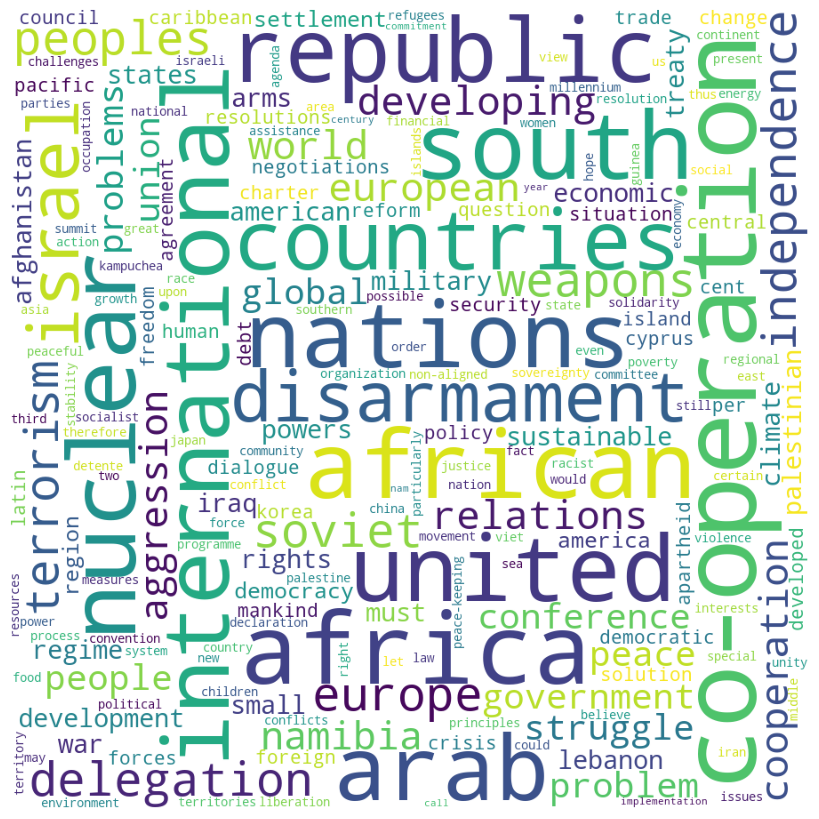

In [11]:
# Create a WordCloud object with specified parameters (background color, width, height, margin)
wc = WordCloud(background_color='white', width = 900, height=900, margin=2)
# Fit the WordCloud with TF-IDF values from the 'tfidf' column of the 'freq_df' DataFrame
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## TERM FREQUENCY VS TFIDF

##  USING YEAR COLUMN AND 1970 VALUE

In [12]:
# Filter the DataFrame to include only rows where the 'year' column is equal to 1970
import pandas as pd
file = "un-general-debates-blueprint.csv"
df = pd.read_csv(file)
#df = df[df['year']==1970]
df.head(10)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


## LOADING ENGLISH STOPWORDS USING NLTK

In [13]:
# Download the 'stopwords' dataset from nltk, which contains common English stopwords
import nltk 
nltk.download('stopwords')
# Create a set of English stopwords using the nltk corpus
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"should've", 'my', 'down', 'doesn', 'then', 'what', 'haven', 'some', 'about', 'too', 'you', 'both', 'before', 'that', 'while', 'under', 'more', 'than', "weren't", 'should', "it's", "you're", 'from', 'over', 'when', 'is', "shouldn't", 'not', "shan't", 'do', "wasn't", "you'd", "isn't", 'are', 'them', 'at', 'up', 'ain', "mightn't", 'our', "that'll", 'hadn', 'few', 'again', 'will', 'she', 'each', 'it', 'shouldn', 'having', 'as', 'where', 'if', 'or', "hasn't", 'his', 'him', 'on', "doesn't", 'ourselves', 'now', 'themselves', 'very', 'its', 'and', 'any', "aren't", 'such', 'were', 'isn', 'who', "you'll", 'once', 'to', 'd', 'am', 'a', 'in', 'myself', 'herself', 'because', 'until', 'have', 'mightn', 'being', 'theirs', 'ma', 'they', 'been', 'by', 'wasn', 'here', "hadn't", 'll', 'he', 'an', 'against', 'yourselves', 'didn', "mustn't", 'own', 'don', 'm', 'all', 'has', 'out', "she's", 'your', 'but', 'just', 'there', 've', "didn't", 'through', 'further', 're', 'yours', "needn't", 'during', 's', 'off'

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/likithareddykotla/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## TEXT PREPROCESSING PIPELINE USING REGULAR EXPRESSIONS AND NLTK

In [14]:
# Import the 'regex' module and alias it as 're'
import regex as re
# Function to tokenize text using a regex pattern
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
# Function to remove stopwords from a list of tokens
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

# Function to prepare text by applying a processing pipeline
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
# Apply the 'prepare' function to the 'text' column of the DataFrame and create a new 'tokens' column
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

## TOKEN FREQUENCY ANALYSIS USING COUNTER AND PANDAS

In [15]:
# Import the Counter class from the collections module
from collections import Counter
# Initialize a Counter object to count token frequencies
counter = Counter()
# Map the 'update' method of the Counter to each list of tokens in the 'tokens' column of the DataFrame
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


## TOKEN LENGTH AND KEYWORD COUNTING IN DATAFRAME 

In [16]:
# Add a new column 'num_tokens' to the DataFrame, representing the number of tokens in each document
df['num_tokens'] = df['tokens'].map(len)

# Function to count the occurrences of specified keywords in a list of tokens
def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

## WORDCLOUD VISUALIZATION FROM TOKEN FREQUENCIES

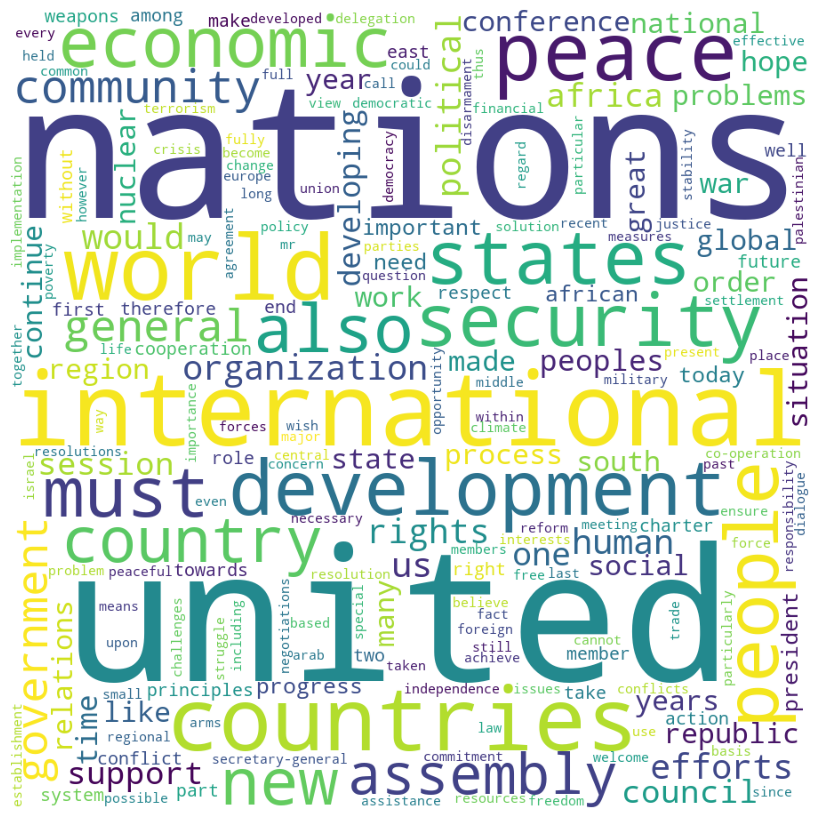

In [17]:
# Import necessary modules for creating the word cloud and plotting
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 900, height=900, margin=2)
# Fit the WordCloud with token frequencies converted to a dictionary
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
# Display the WordCloud using imshow
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## INVERSE DOCUMENT FREQUENCY COMPUTATION(IDF) FOR TOKENIZED DATA

In [18]:
#importing numpy
import numpy as np
# Function to compute inverse document frequency (IDF)
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    # Compute IDF values using the formula: log(total number of documents / document frequency) + 0.1
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

## COMPUTING TERM FREQUENCY INVERSE DOCUMENT FREQUENCY(TF-IDF) SCORES


In [19]:
# Compute TF-IDF (Term Frequency-Inverse Document Frequency) scores
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


## VISUALIZING TF-IDF WEIGHTED WORDCLOUD

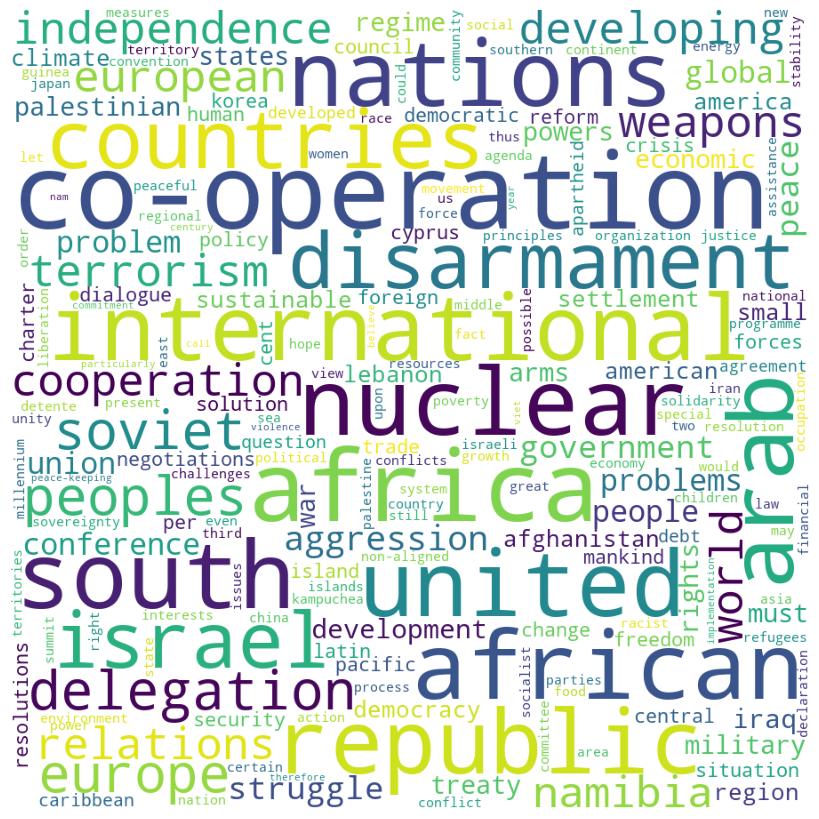

In [20]:
# Create a WordCloud object with specified parameters (background color, width, height, margin)
wc = WordCloud(background_color='white', width = 900, height=900, margin=2)
# Fit the WordCloud with TF-IDF values converted to a dictionary
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
# Turn off axis labels
plt.axis("off")
plt.tight_layout(pad = 0)
 
# Show the WordCloud plot
plt.show()

## COUNTING KEYWORDS BY GROUP IN DATAFRAME

In [21]:
# Function to count occurrences of specified keywords by group in a DataFrame
def count_keywords_by(df, by, keywords, column='tokens'):
    # Reset the index of the DataFrame to handle gaps in the supplied index
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    # Group by the specified column(s) and sum the counts, then sort the values
    return freq_df.groupby(by=by).sum().sort_values(by)

## HEATMAP VISUALISATION OF RELATIVE FREQUENCIES OF KEYWORDS OVER ALL YEARS

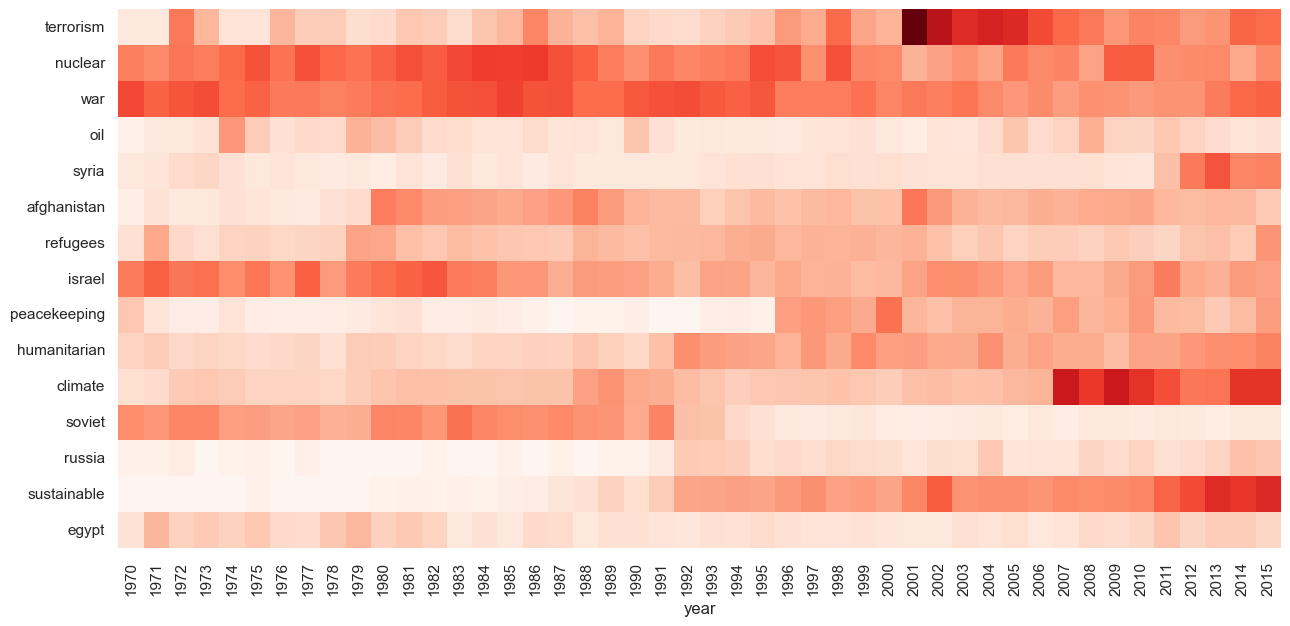

In [22]:
# Import the seaborn library and alias it as 'sns'
import seaborn as sns
# Specify a list of keywords for analysis
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)